In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfde import Simple_CF_Descent
from cfde import CF_Descent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Naive CF-Descent

This file contains the initial attempts at making CF-Descent work and tests to see it's validity

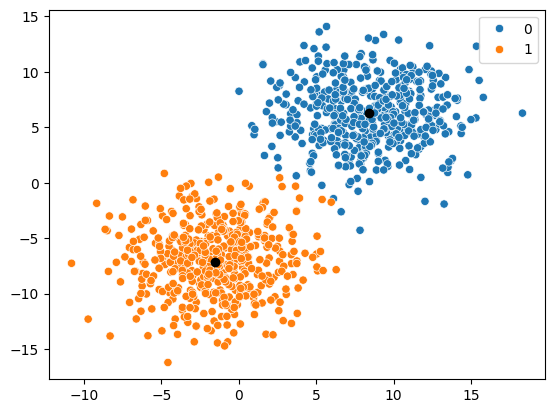

In [85]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [86]:
#x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)
x,cf,h = CF_Descent(X,y, target=1.0, centers=centers)

label_mapping = {0: "cluster 0", 1: "cluster 1"}


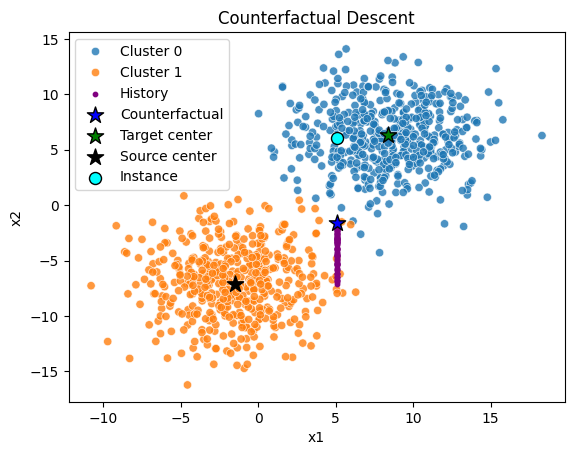

In [106]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = [f'Cluster {i}' for i in y]
df = df.sort_values(by='label')

sns.scatterplot(df, x='x1', y='x2', hue='label', alpha=0.8, palette='tab10')
plt.scatter(x=hx, y=hy, color='purple', label='History', s=10)
plt.scatter(x=cf[0], y=cf[1], color='blue', label="Counterfactual", marker='*', s=150, edgecolor='black')
plt.scatter(x=centers[0][0], y=centers[0][1], color='green', s=150, 
                  marker='*', label='Target center', zorder=5, edgecolor='black')
plt.scatter(x=centers[1][0], y=centers[1][1], color='black', s=150, 
                  marker='*', label='Source center', zorder=5, edgecolor='black')
plt.scatter(x=x[0], y=x[1], color='cyan', label='Instance', s=75, edgecolor='black')
plt.title('Counterfactual Descent')
plt.legend()

# PCA attempt

<Axes: >

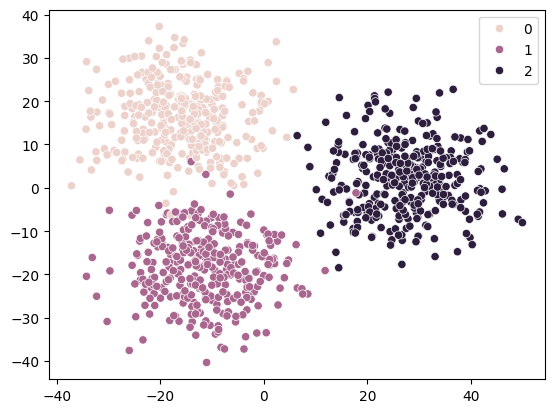

In [80]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [81]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,-7.982480,3.433875,-4.989392,4.742085,3.146637,-13.035930,-24.008760,0.516364,-7.244642,-5.584805,...,4.948368,5.625012,-16.211190,0.484734,-24.451770,1.539126,2.344354,7.083174,0.017438,1.0
1,10.332673,7.239997,-11.201866,-13.925530,-0.091676,-4.474446,-23.128821,-4.014549,-25.682415,5.185800,...,0.132270,-0.221660,0.660626,3.447079,-4.335669,13.016805,-2.025062,9.154821,-10.611951,0.0
2,7.365402,-0.584839,2.520676,-2.308168,-4.389945,-7.174090,-19.092793,5.099332,-13.339714,-11.582188,...,-1.320870,-11.245217,3.046803,-0.775585,-15.313706,-10.888251,-1.211092,-2.278585,6.139624,1.0
3,11.065278,-4.680532,1.017094,-6.627683,-22.924810,-16.190426,-9.522301,-22.859414,14.253572,11.743528,...,-7.812802,3.784351,-9.023372,13.958742,0.369275,-11.474480,-5.549437,-11.161032,13.521069,2.0
4,0.305763,-1.492736,11.025018,-14.456595,1.756588,-7.055288,-9.455880,5.941657,-8.567856,-23.960490,...,18.536565,2.165335,11.041734,8.961981,-21.551950,11.384149,-3.237461,-18.665120,12.422339,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.967239,9.278008,-3.231121,-3.152573,7.212222,-10.099951,-7.501083,2.202533,-15.793399,-11.891825,...,16.441130,-9.947063,-8.906188,15.629948,-11.372377,-12.977552,6.139304,-0.753070,-18.838206,1.0
996,-3.985011,-15.077271,2.035288,3.746062,1.893244,-4.692677,-24.743287,-15.400705,8.294450,8.598859,...,2.099696,-1.752084,-19.770176,-6.559717,-9.873440,-14.174704,2.613086,-3.499833,0.804936,2.0
997,-2.536088,1.504142,-9.312372,-10.172964,11.172360,-15.999194,-6.069379,-2.015590,3.342760,-13.596715,...,15.755627,-2.526344,1.975585,12.635021,-8.429143,2.905261,-15.305532,-4.116549,-9.602119,0.0
998,5.854442,-1.013294,-3.284511,4.358546,-9.619053,-17.218813,4.142149,-14.959876,-11.369336,16.021698,...,6.817925,-15.771467,-15.337962,8.174982,4.570348,-4.044765,5.179908,0.700135,10.538636,2.0


In [82]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

In [83]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

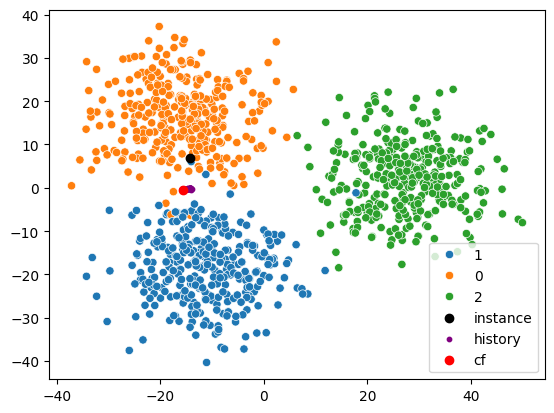

In [84]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()